In [31]:
# %load template_strategy.py
#------Do not change those imports------
from pandas import DataFrame
from bot_entity.bot import Bot
import talib.abstract as ta
from technical.util import resample_to_interval, resampled_merge
#---------------------------------------


# Do not change class and methods names

class Strategy(Bot):

    def calc_indicators(self, candles:DataFrame):
        pass


    def check_buy_signals(self, indicators):
        pass


    def check_sell_signals(self, indicators):
        pass



ModuleNotFoundError: No module named 'bot_entity'

In [32]:
# %load 'simple_strategy/config.yml'
# %load template_config.yml
# example of bot_entity configuration

transaction_amount: 50
stop_loss: 10

exchange: binance
currency_pairs:
  - BTC/USDT
ticker: 1h
last_n_candles: 200
sell_all: False
timeout: 30
max_open_trades: 5


SyntaxError: invalid syntax (360277194.py, line 9)

In [33]:
import crypto_package as cp
import pandas
import matplotlib.pyplot as plt
from pandas import to_datetime

In [34]:
pip install "ipywidgets>=7.6"

Note: you may need to restart the kernel to use updated packages.


In [143]:
candles, _= cp.get_candles('binance', 'ICX/USDT', '1h', last_n_candles=800)
candles = candles.rename(columns={"time": "date"})
candles["date"] = to_datetime(candles["date"], unit='s')
print(candles)

     close   high    low   open                date     volume
0    2.147  2.156  2.116  2.144 2021-11-12 15:00:00   239566.7
1    2.187  2.192  2.124  2.149 2021-11-12 16:00:00  1003055.9
2    2.194  2.205  2.161  2.187 2021-11-12 17:00:00   395603.9
3    2.194  2.219  2.180  2.194 2021-11-12 18:00:00   308540.6
4    2.161  2.200  2.155  2.194 2021-11-12 19:00:00   232884.9
..     ...    ...    ...    ...                 ...        ...
795  1.106  1.106  1.075  1.078 2021-12-15 18:00:00   116633.7
796  1.163  1.168  1.094  1.109 2021-12-15 19:00:00   983198.6
797  1.187  1.196  1.158  1.164 2021-12-15 20:00:00   557020.2
798  1.187  1.193  1.182  1.188 2021-12-15 21:00:00   177071.3
799  1.185  1.188  1.184  1.186 2021-12-15 22:00:00     6271.8

[800 rows x 6 columns]


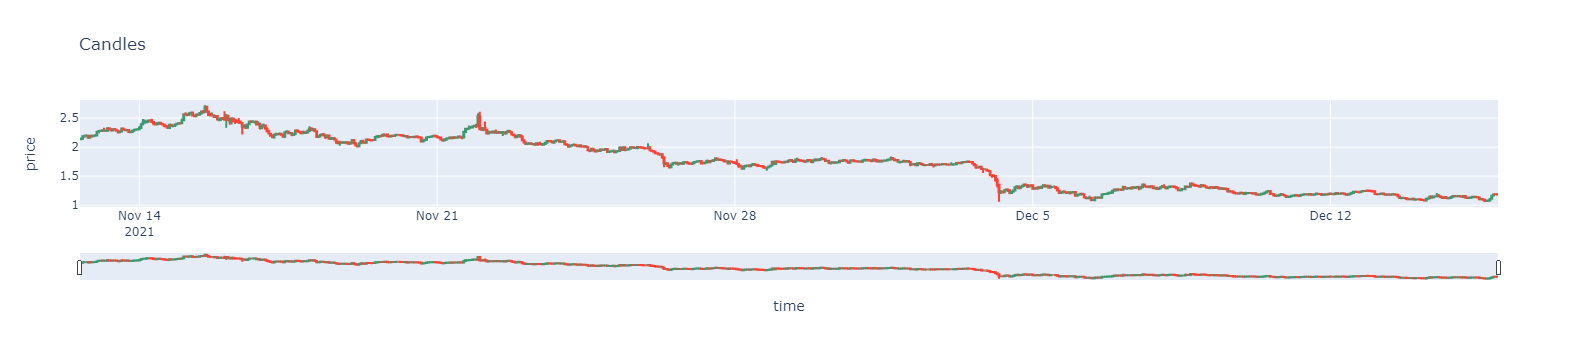

In [144]:
import plotly.graph_objects as go
#SWIECZKI

candles = candles.rename(columns={"time": "date"})
candles["date"] = to_datetime(candles["date"], unit='s')
fig = go.Figure(data=[go.Candlestick(
                x=candles['date'],
                open=candles['open'],
                high=candles['high'],
                low=candles['low'],
                close=candles['close'])])

fig.update_layout(
    title="Candles",
    xaxis_title="time",
    yaxis_title="price",
)
fig.show()

In [111]:
_, price = cp.get_live_price('binance', ['ICX/USDT'])
print(price)

            ask askVolume average baseVolume    bid bidVolume change  close  \
ICX/USDT  1.155     872.3    None  7118254.0  1.153     919.1  0.034  1.155   

                          datetime   high  \
ICX/USDT  2021-12-15T19:43:49.753Z  1.165   

                                                       info   last    low  \
ICX/USDT  {'askPrice': '1.15500000', 'askQty': '872.3000...  1.155  1.065   

           open percentage previousClose   quoteVolume    symbol  \
ICX/USDT  1.121      3.033         1.119  7995421.0038  ICX/USDT   

              timestamp      vwap  
ICX/USDT  1639597429753  1.123228  


In [145]:
from crypto_package.fake_bot.fake_bot import FakeBot
from crypto_package.fake_bot.analyze_functions import plot_profit, plot_pairs_profit, plot_block_profit, plot_balance
import talib.abstract as ta

In [152]:
def calc_indicators(candles):
        candles['rsi'] = ta.RSI(candles, timeperiod=14)
        return candles

def check_buy_signals(indicators):
    if indicators.iloc[-1]['rsi'] > 70:
        return True
    else:
        return False

def check_sell_signals(indicators):
    if indicators.iloc[-1]['rsi'] < 30:
        return True
    else:
        return False


fbot = FakeBot("simple_strategy/config.yml")
res0 = fbot.test_strategy(calc_indicators, check_buy_signals, check_sell_signals, last_n_days=20)



/tmp/ipykernel_64/1036398316.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



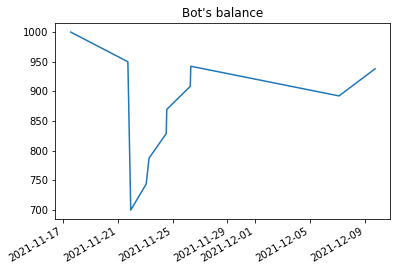

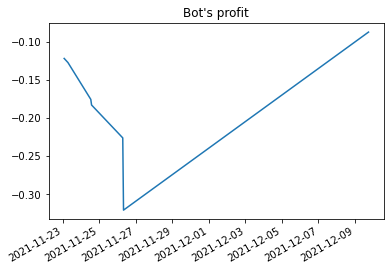

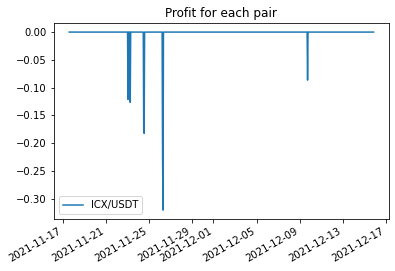

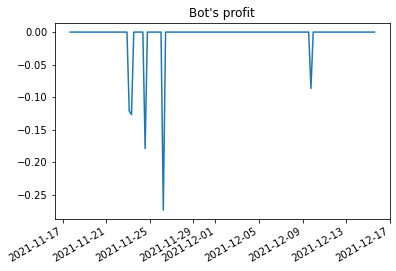

In [147]:
plot_balance(res0)
plot_profit(res0)
plot_pairs_profit(res0,fbot.config["currency_pairs"] )
plot_block_profit(res0, hours=5)

In [148]:
res0

AnalysisResult(trades=[Trade(pair='ICX/USDT', is_buy=True, price=2.336, timestamp=datetime.datetime(2021, 11, 21, 18, 0), amount=21.4041095890411), Trade(pair='ICX/USDT', is_buy=True, price=2.338, timestamp=datetime.datetime(2021, 11, 21, 19, 0), amount=21.3857998289136), Trade(pair='ICX/USDT', is_buy=True, price=2.36, timestamp=datetime.datetime(2021, 11, 21, 20, 0), amount=21.186440677966104), Trade(pair='ICX/USDT', is_buy=True, price=2.369, timestamp=datetime.datetime(2021, 11, 21, 21, 0), amount=21.105951878429714), Trade(pair='ICX/USDT', is_buy=True, price=2.358, timestamp=datetime.datetime(2021, 11, 21, 22, 0), amount=21.204410517387615), Trade(pair='ICX/USDT', is_buy=True, price=2.53, timestamp=datetime.datetime(2021, 11, 21, 23, 0), amount=19.762845849802375), Trade(pair='ICX/USDT', is_buy=False, price=2.053, timestamp=datetime.datetime(2021, 11, 23, 2, 0), amount=21.4041095890411), Trade(pair='ICX/USDT', is_buy=False, price=2.042, timestamp=datetime.datetime(2021, 11, 23, 7, 0

In [51]:
# from random import randint
# def calc_ind(dataframe):
#     return dataframe

# def buy_sig(dataframe):
#     r = randint(0,10)
#     if r>8:
#         return True
#     else:
#         return False

# def sell_sig(dataframe):
#     r = randint(0, 10)
#     if r > 5:
#         return True
#     else:
#         return False


In [96]:
# fbot1 = FakeBot("simple_strategy/config.yml")
# res1 = fbot.test_strategy(calc_ind, buy_sig, sell_sig, last_n_days=5)
# print(res1.trades)

[Trade(pair='ICX/USDT', is_buy=True, price=1.185, timestamp=datetime.datetime(2021, 12, 6, 15, 0), amount=42.19409282700422), Trade(pair='ICX/USDT', is_buy=True, price=1.192, timestamp=datetime.datetime(2021, 12, 6, 17, 0), amount=41.946308724832214), Trade(pair='ICX/USDT', is_buy=False, price=1.212, timestamp=datetime.datetime(2021, 12, 6, 20, 0), amount=42.19409282700422), Trade(pair='ICX/USDT', is_buy=False, price=1.272, timestamp=datetime.datetime(2021, 12, 7, 0, 0), amount=41.946308724832214), Trade(pair='ICX/USDT', is_buy=True, price=1.318, timestamp=datetime.datetime(2021, 12, 7, 3, 0), amount=37.93626707132018), Trade(pair='ICX/USDT', is_buy=True, price=1.285, timestamp=datetime.datetime(2021, 12, 7, 4, 0), amount=38.91050583657588), Trade(pair='ICX/USDT', is_buy=False, price=1.285, timestamp=datetime.datetime(2021, 12, 7, 4, 0), amount=37.93626707132018), Trade(pair='ICX/USDT', is_buy=False, price=1.292, timestamp=datetime.datetime(2021, 12, 7, 5, 0), amount=38.91050583657588)

In [157]:
from crypto_package.fake_bot.analyze_functions import generate_profit, generate_balance
from crypto_package.fake_bot.models import AnalysisResult

In [158]:
profit_x, profit_y = generate_profit(res0, 'ICX/USDT')
res0 = res0.trades

In [208]:
import plotly.graph_objects as go
from datetime import datetime

def get_candles(pair,exchange,ticker,last_candles):
    candles, _= cp.get_candles(exchange, pair, ticker, last_n_candles=last_candles) #TODO add start end time
    return candles
    
def plot_trades_on_candles(res:AnalysisResult, pair:str, exchange:str, ticker:str, last_n_candles:int):
    candles = get_candles(pair,exchange,ticker,last_n_candles)

    candles = candles.rename(columns={"time": "date"})
    candles["date"] = to_datetime(candles["date"], unit='s')
    #PLOT TRADES WITH CANDLES
    
    if type(res) != list:
        res = res.trades

    buy_trades_price = [tr.price for tr in res if tr.is_buy and tr.pair == pair]
    buy_trades_time = [tr.timestamp for tr in res if tr.is_buy and tr.pair == pair]

    sell_trades_price = [tr.price for tr in res if not tr.is_buy and tr.pair == pair]
    sell_trades_time = [tr.timestamp for tr in res if not tr.is_buy and tr.pair == pair]

    # fig = go.Figure()
    fig = plot_trades(res, pair, exchange, ticker, last_n_candles)

    fig.add_trace(go.Candlestick(
                    x=candles['date'],
                    open=candles['open'],
                    high=candles['high'],
                    low=candles['low'],
                    close=candles['close']))

#     fig.add_trace(go.Scatter(
#         x=buy_trades_time,
#         y=buy_trades_price,
#         mode = 'markers',
#         name='buy trades',
#         marker_symbol='diamond',
#         marker=dict(
#             color='blue',
#             line_width=2,
#             size=7,

#         )
#         # xperiod="M1",
#         # xperiodalignment="middle",
#         # hovertemplate="%{y}%{_xother}"
#     ))

#     fig.add_trace(go.Scatter(
#         x=sell_trades_time,
#         y=sell_trades_price,
#         mode = 'markers',
#         name='sell trades',
#         marker_symbol='square',
#         marker=dict(
#             color='yellow',
#             line_width=2,
#             size=7
#         )
#         # xperiod="M1",
#         # xperiodalignment="middle",
#         # hovertemplate="%{y}%{_xother}"
#     ))

#     fig.update_layout(
#         title="Candles with profit",
#         xaxis_title="time",
#         yaxis_title="price",
#         width=1500,
#         height=800
#     )
    # fig.show()
    
    return fig

def plot_trades(res:AnalysisResult, pair:str, exchange:str, ticker:str, last_n_candles:int):
#     candles = get_candles(pair,exchange,ticker,last_n_candles)

#     candles = candles.rename(columns={"time": "date"})
#     candles["date"] = to_datetime(candles["date"], unit='s')
    #PLOT TRADES WITH CANDLES
    if type(res) != list:
        res = res.trades

    buy_trades_price = [tr.price for tr in res if tr.is_buy and tr.pair == pair]
    buy_trades_time = [tr.timestamp for tr in res if tr.is_buy and tr.pair == pair]

    sell_trades_price = [tr.price for tr in res if not tr.is_buy and tr.pair == pair]
    sell_trades_time = [tr.timestamp for tr in res if not tr.is_buy and tr.pair == pair]

    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=buy_trades_time,
        y=buy_trades_price,
        mode = 'markers',
        name='buy trades',
        marker_symbol='diamond',
        marker=dict(
            color='blue',
            line_width=2,
            size=7,

        )
        # xperiod="M1",
        # xperiodalignment="middle",
        # hovertemplate="%{y}%{_xother}"
    ))

    fig.add_trace(go.Scatter(
        x=sell_trades_time,
        y=sell_trades_price,
        mode = 'markers',
        name='sell trades',
        marker_symbol='square',
        marker=dict(
            color='yellow',
            line_width=2,
            size=7
        )
        # xperiod="M1",
        # xperiodalignment="middle",
        # hovertemplate="%{y}%{_xother}"
    ))

    fig.update_layout(
        title="Candles with profit",
        xaxis_title="time",
        yaxis_title="price",
        width=1500,
        height=800
    )
    # fig.show()
    
    return fig

/tmp/ipykernel_64/4161548860.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



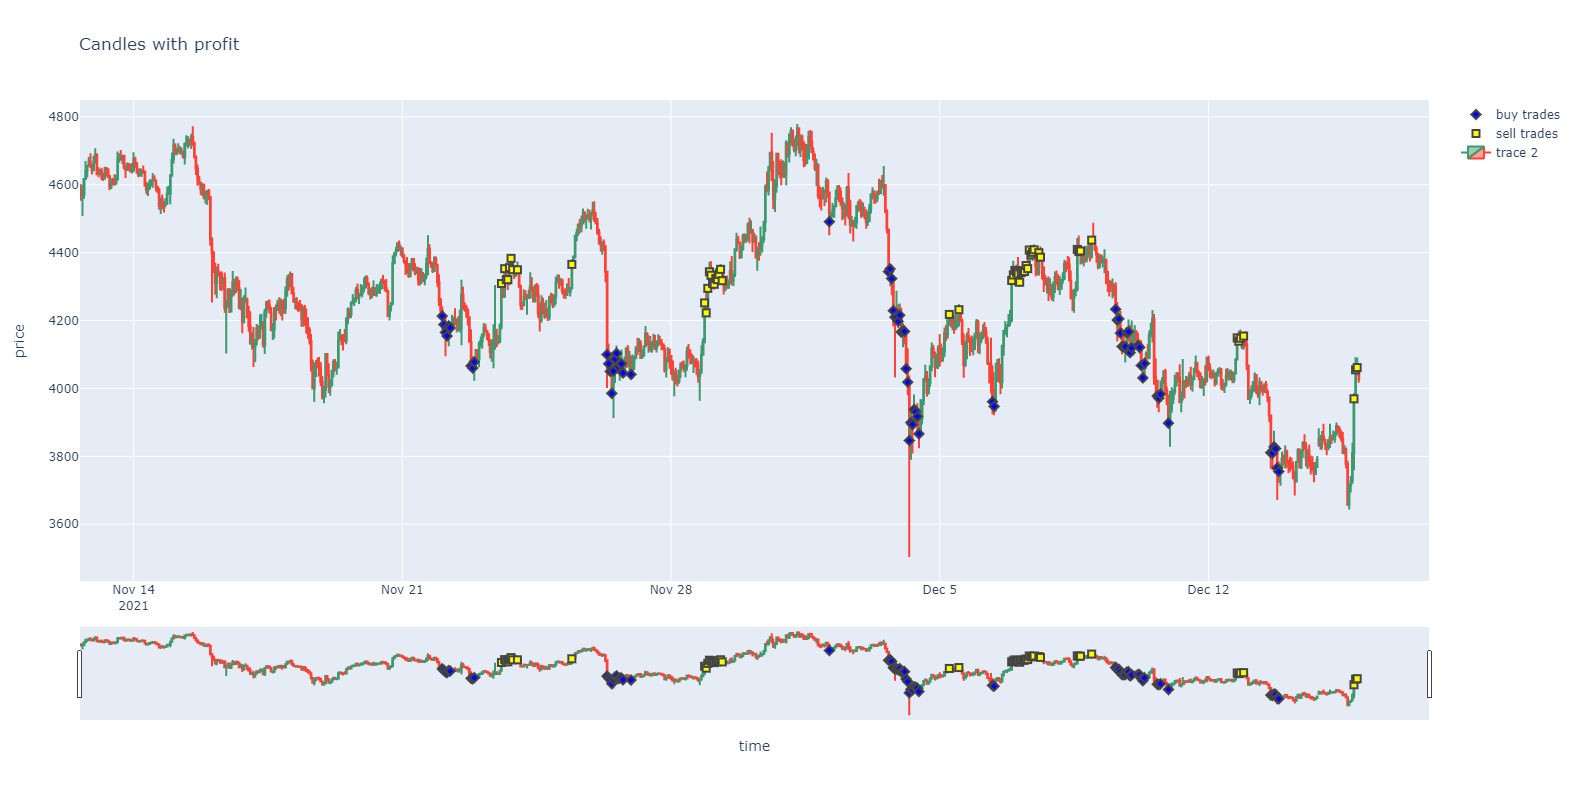

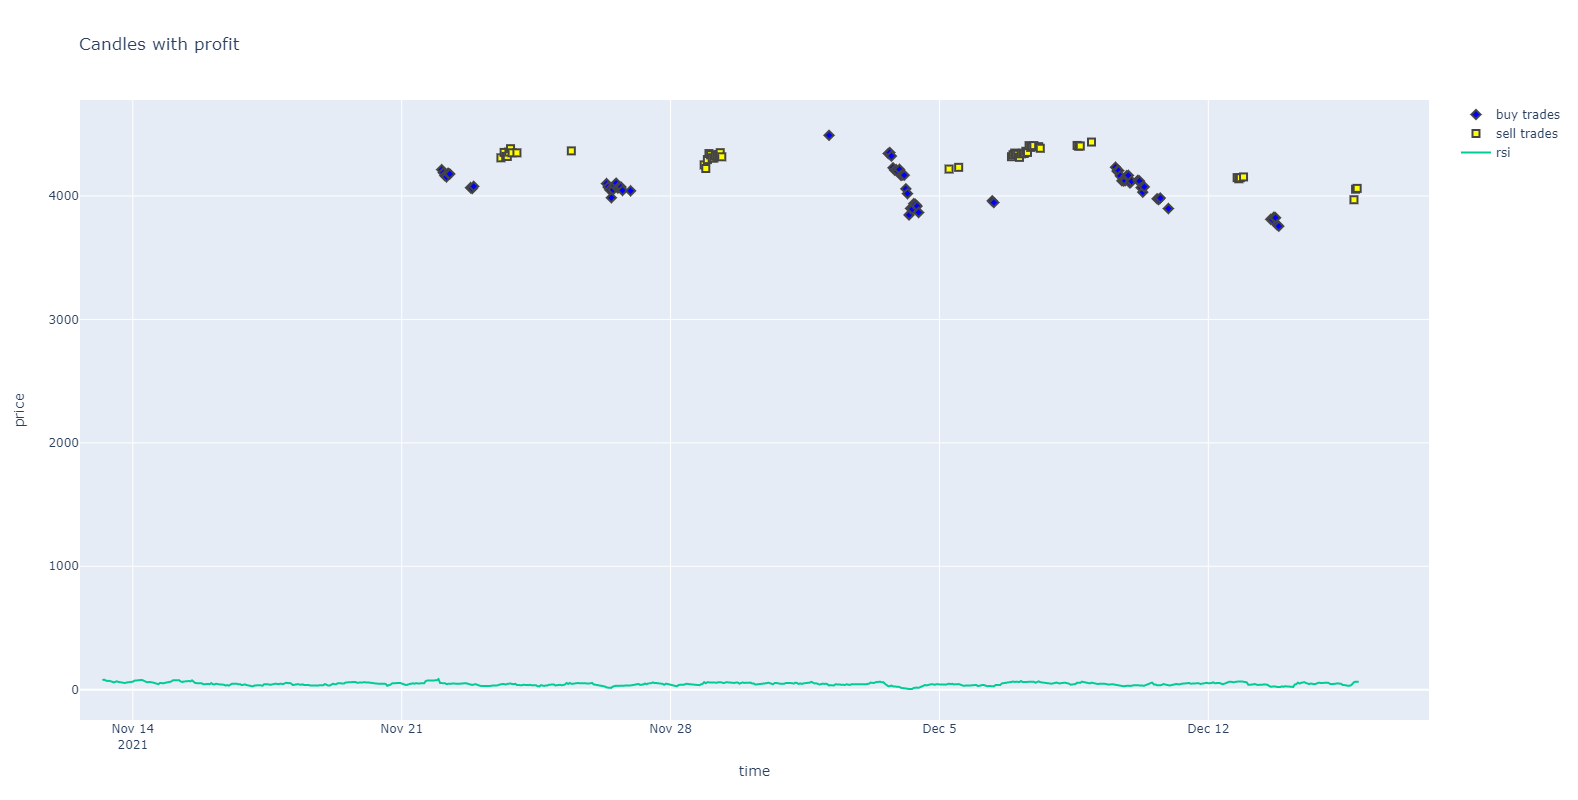

In [209]:
fbot = FakeBot("simple_strategy/config.yml")
res0 = fbot.test_strategy(calc_indicators, check_buy_signals, check_sell_signals, last_n_days=20)
fig = plot_trades_on_candles(res0, fbot.config['currency_pairs'][0], fbot.config['exchange'], fbot.config['ticker'], 800)
fig.show()
fig = plot_trades(res0, fbot.config['currency_pairs'][0], fbot.config['exchange'], fbot.config['ticker'], 800)
candles['rsi'] = ta.RSI(candles, timeperiod=14)
fig.add_trace(go.Scatter(
    x=candles['date'],
    y=candles['rsi'],
    mode = 'lines',
    name='rsi',
    # marker_symbol='square',
    # marker=dict(
    #     color='yellow',
    #     line_width=2,
    #     size=7
    # )
    # xperiod="M1",
    # xperiodalignment="middle",
    # hovertemplate="%{y}%{_xother}"
))


In [210]:
candles = candles.rename(columns={"time": "date"})
candles["date"] = to_datetime(candles["date"], unit='s')

import plotly.graph_objects as go
from datetime import datetime

#PLOT TRADES WITH CANDLES AND RSI

buy_trades_price = [tr.price for tr in res0 if tr.is_buy]
buy_trades_time = [tr.timestamp for tr in res0 if tr.is_buy]

sell_trades_price = [tr.price for tr in res0 if not tr.is_buy]
sell_trades_time = [tr.timestamp for tr in res0 if not tr.is_buy]



fig = go.Figure()

fig.add_trace(go.Candlestick(
                x=candles['date'],
                open=candles['open'],
                high=candles['high'],
                low=candles['low'],
                close=candles['close']))

fig.add_trace(go.Scatter(
    x=buy_trades_time,
    y=buy_trades_price,
    mode = 'markers',
    name='buy trades',
    marker_symbol='diamond',
    marker=dict(
        color='blue',
        line_width=2,
        size=7,
        
    )
    # xperiod="M1",
    # xperiodalignment="middle",
    # hovertemplate="%{y}%{_xother}"
))

fig.add_trace(go.Scatter(
    x=sell_trades_time,
    y=sell_trades_price,
    mode = 'markers',
    name='sell trades',
    marker_symbol='square',
    marker=dict(
        color='yellow',
        line_width=2,
        size=7
    )
    # xperiod="M1",
    # xperiodalignment="middle",
    # hovertemplate="%{y}%{_xother}"
))

candles['rsi'] = ta.RSI(candles, timeperiod=14)
fig.add_trace(go.Scatter(
    x=candles['date'],
    y=candles['rsi'],
    mode = 'lines',
    name='rsi',
    # marker_symbol='square',
    # marker=dict(
    #     color='yellow',
    #     line_width=2,
    #     size=7
    # )
    # xperiod="M1",
    # xperiodalignment="middle",
    # hovertemplate="%{y}%{_xother}"
))

fig.update_layout(
    title="Candles with profit",
    xaxis_title="time",
    yaxis_title="price",
    width=1500,
    height=800
)
fig.show()

AttributeError: 'tuple' object has no attribute 'is_buy'

In [ ]:
def calc_indicators(candles):
        candles['rsi'] = ta.RSI(candles, timeperiod=14)
        return candles

def check_sell_signals(indicators):
    if indicators.iloc[-1]['rsi'] > 70:
        return True
    else:
        return False

def check_buy_signals(indicators):
    if indicators.iloc[-1]['rsi'] < 30:
        return True
    else:
        return False


/tmp/ipykernel_64/4161548860.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



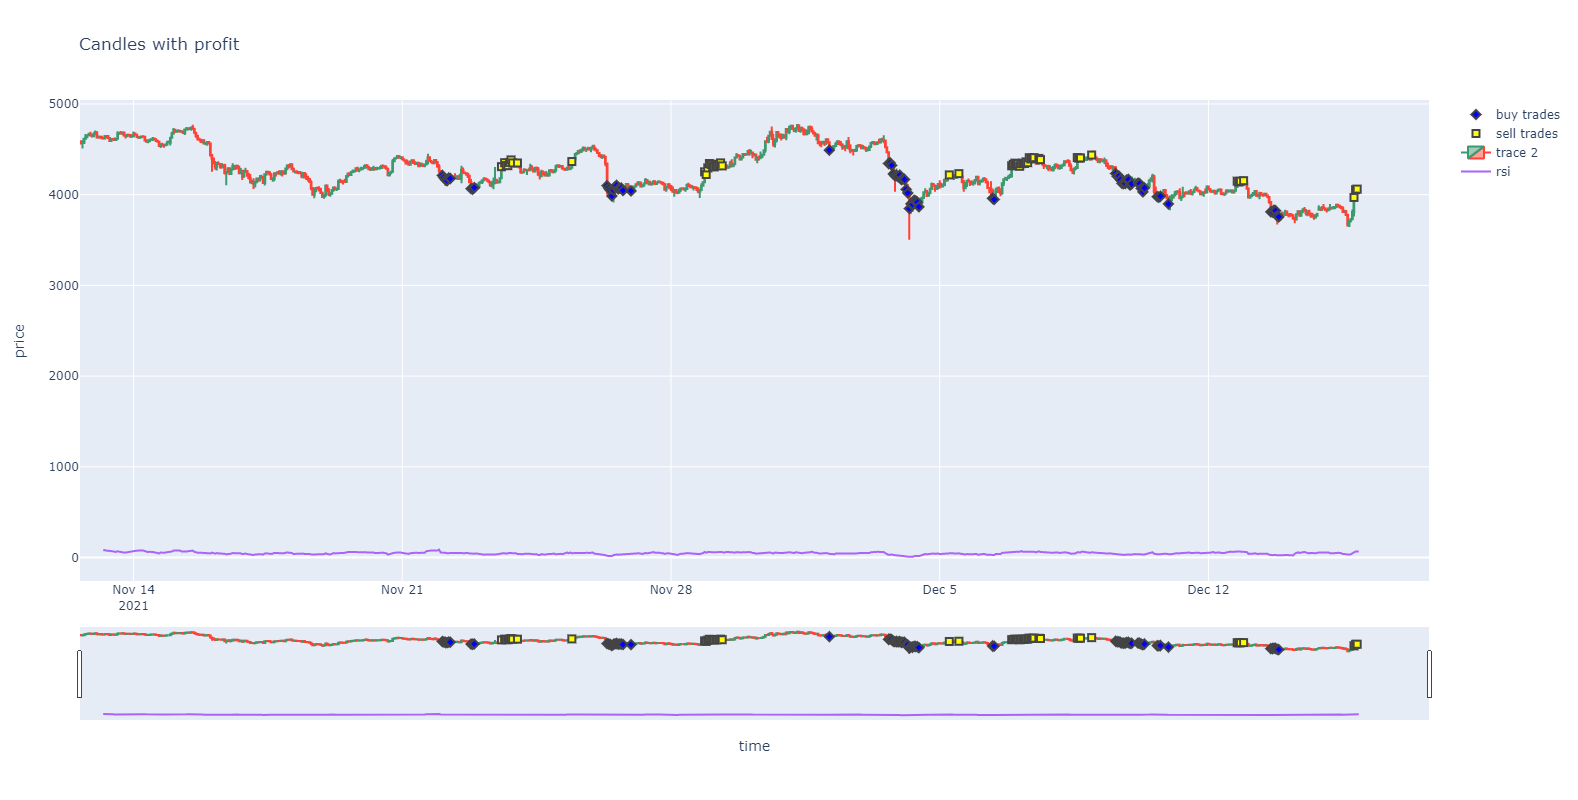

In [211]:
fbot = FakeBot("simple_strategy/config.yml")
res0 = fbot.test_strategy(calc_indicators, check_buy_signals, check_sell_signals, last_n_days=20)
fig = plot_trades_on_candles(res0, fbot.config['currency_pairs'][0], fbot.config['exchange'], fbot.config['ticker'], 800)

candles['rsi'] = ta.RSI(candles, timeperiod=14)
fig.add_trace(go.Scatter(
    x=candles['date'],
    y=candles['rsi'],
    mode = 'lines',
    name='rsi',
    # marker_symbol='square',
    # marker=dict(
    #     color='yellow',
    #     line_width=2,
    #     size=7
    # )
    # xperiod="M1",
    # xperiodalignment="middle",
    # hovertemplate="%{y}%{_xother}"
))

In [212]:
def calc_indicators(candles):
        candles['rsi'] = ta.RSI(candles, timeperiod=14)
        return candles

def check_sell_signals(indicators):
    if indicators.iloc[-1]['rsi'] > 62:
        return True
    else:
        return False

def check_buy_signals(indicators):
    if indicators.iloc[-1]['rsi'] < 35:
        return True
    else:
        return False

/tmp/ipykernel_64/3195819841.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



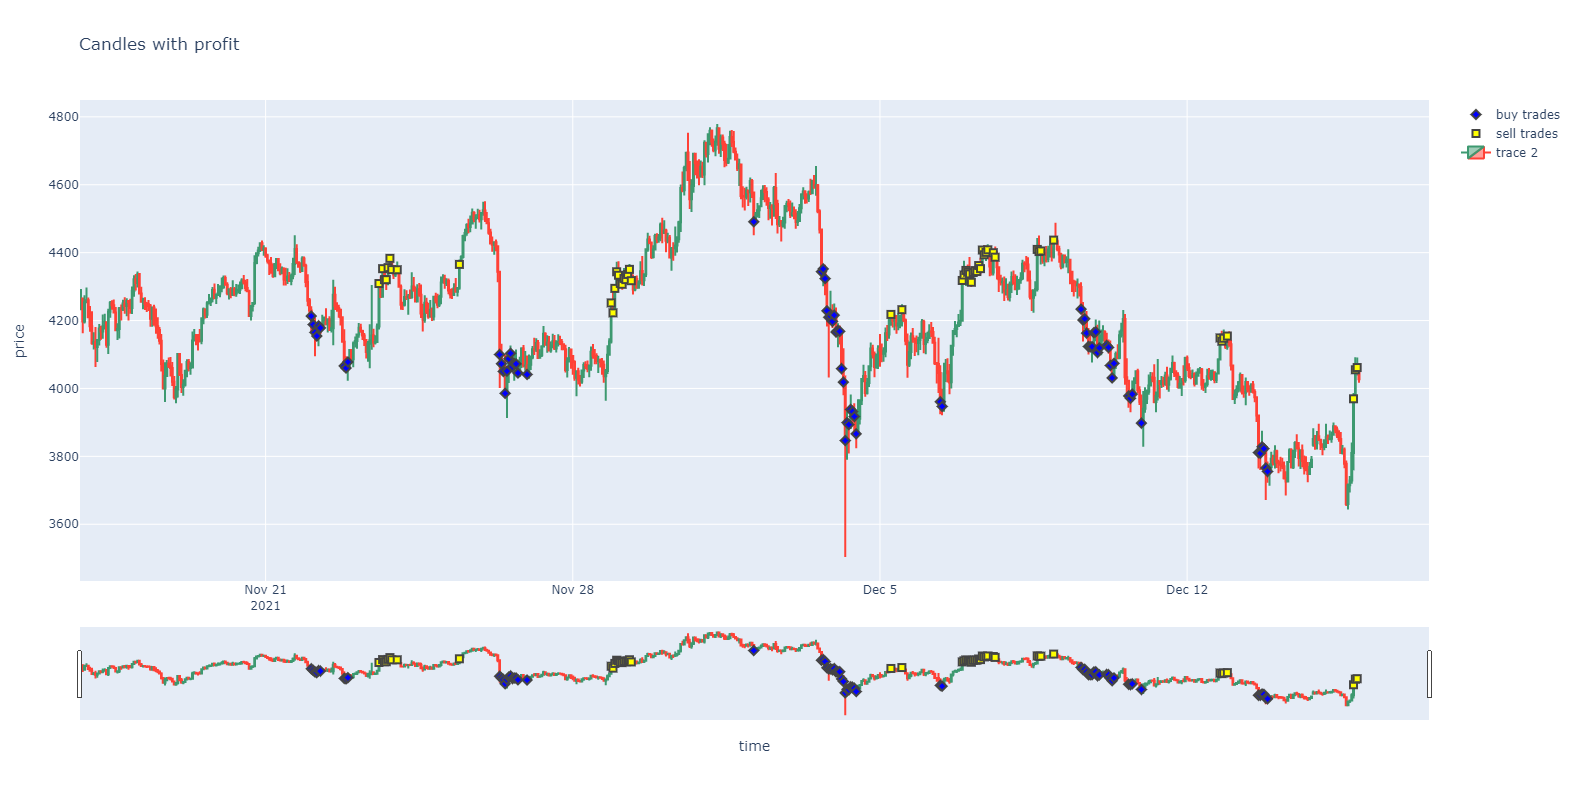

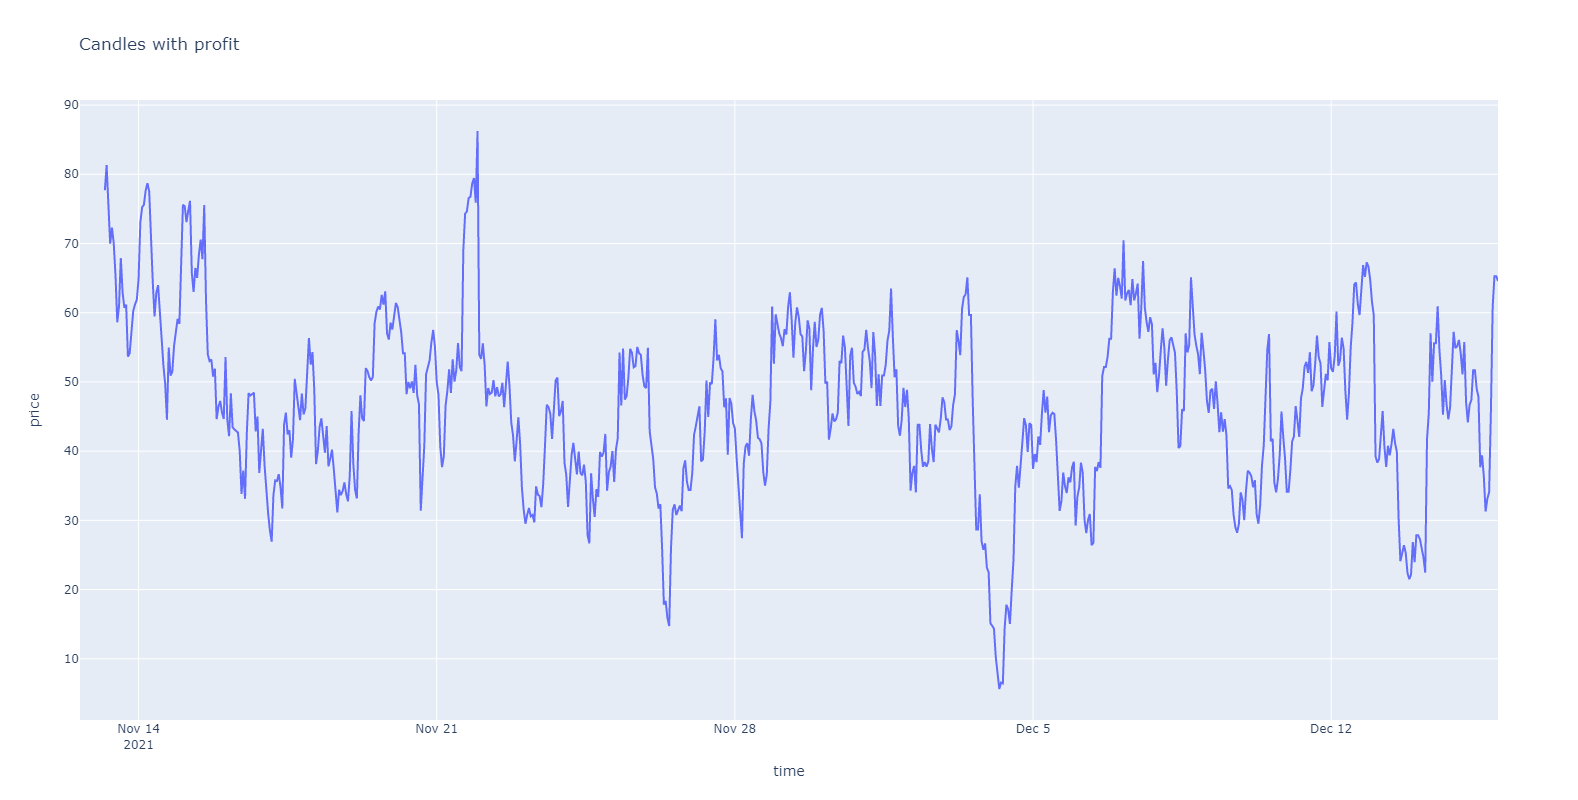

In [213]:
fbot = FakeBot("simple_strategy/config.yml")
res0 = fbot.test_strategy(calc_indicators, check_buy_signals, check_sell_signals, last_n_days=20)
fig = plot_trades_on_candles(res0, fbot.config['currency_pairs'][0], fbot.config['exchange'], fbot.config['ticker'], 700)
fig.show()

fig = go.Figure()
candles['rsi'] = ta.RSI(candles, timeperiod=14)
fig.add_trace(go.Scatter(
    x=candles['date'],
    y=candles['rsi'],
    mode = 'lines',
    name='rsi',
    # marker_symbol='square',
    # marker=dict(
    #     color='yellow',
    #     line_width=2,
    #     size=7
    # )
    # xperiod="M1",
    # xperiodalignment="middle",
    # hovertemplate="%{y}%{_xother}"
))
fig.update_layout(
    title="Candles with profit",
    xaxis_title="time",
    yaxis_title="price",
    width=1500,
    height=800
)
fig.show()

/tmp/ipykernel_64/3266841449.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



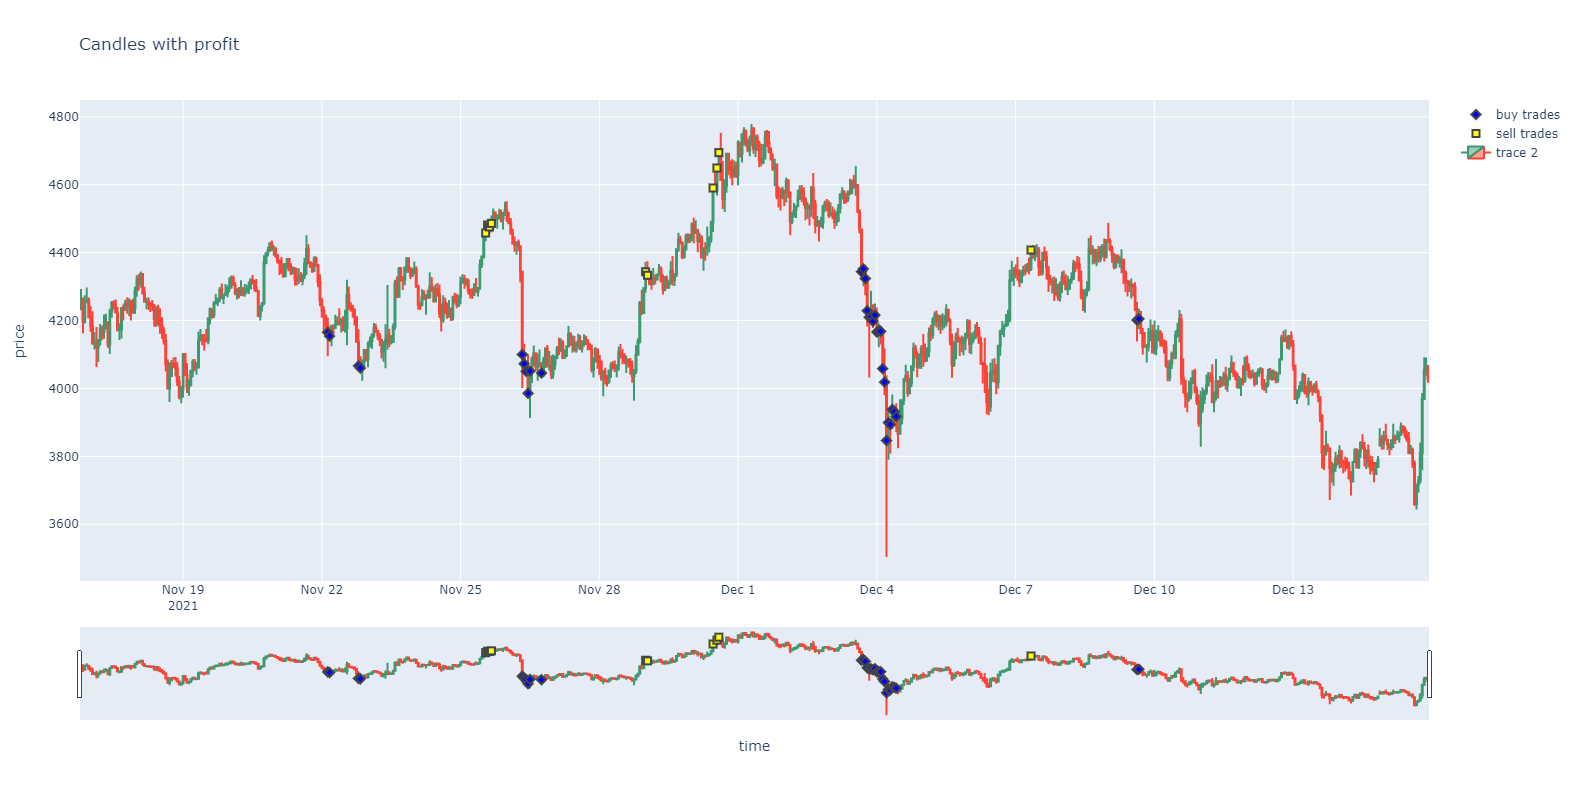

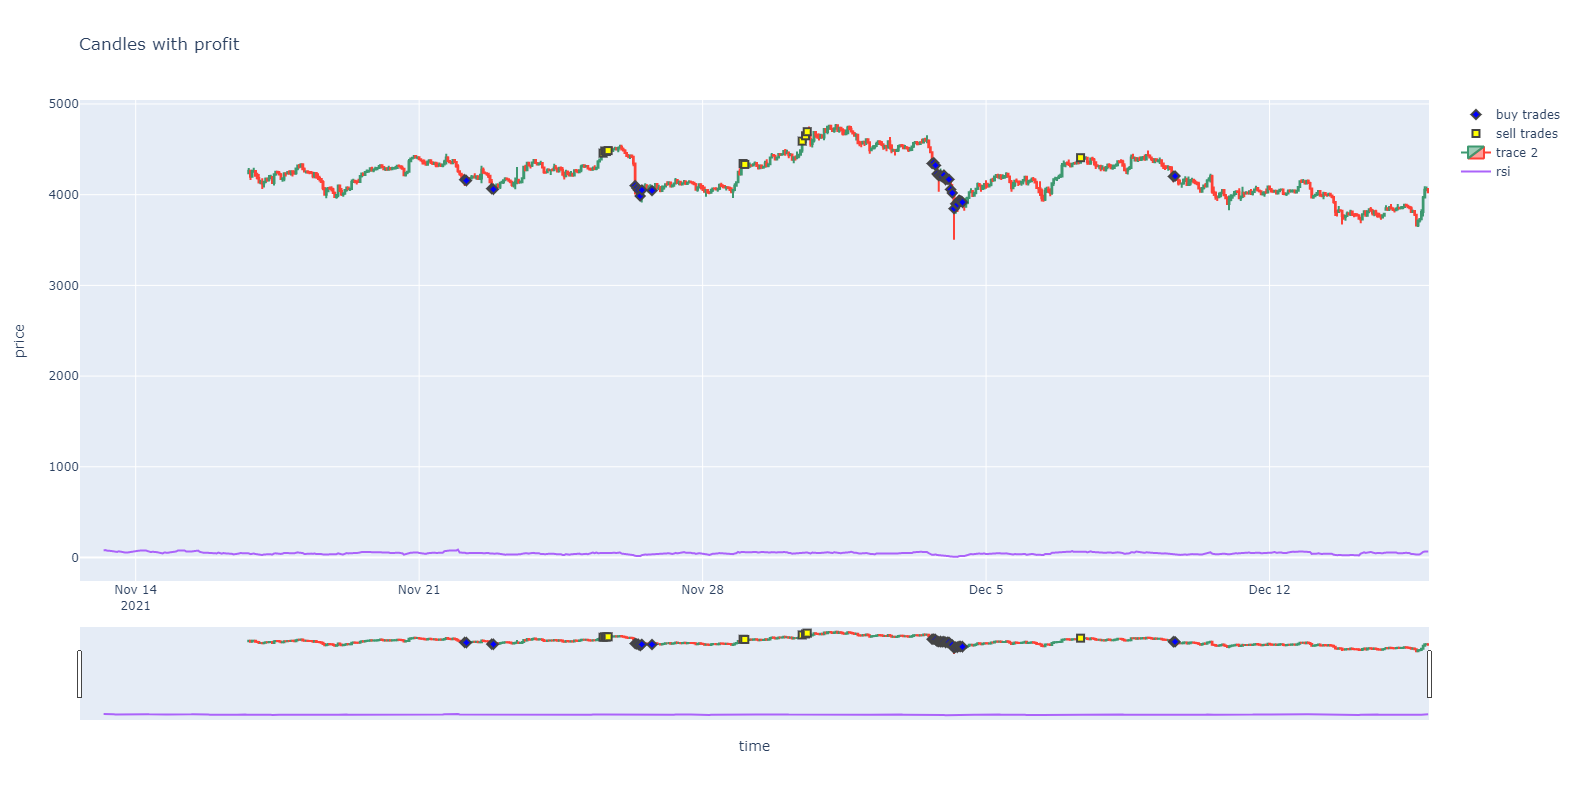

In [221]:
def calc_indicators(candles):
        candles['rsi'] = ta.RSI(candles, timeperiod=14)
        return candles

def check_sell_signals(indicators):
    if indicators.iloc[-1]['rsi'] > 72:
        return True
    else:
        return False

def check_buy_signals(indicators):
    if indicators.iloc[-1]['rsi'] < 30:
        return True
    else:
        return False

fbot = FakeBot("simple_strategy/config.yml")
res0 = fbot.test_strategy(calc_indicators, check_buy_signals, check_sell_signals, last_n_days=20)
fig = plot_trades_on_candles(res0, fbot.config['currency_pairs'][0], fbot.config['exchange'], fbot.config['ticker'], 700)
fig.show()

candles['rsi'] = ta.RSI(candles, timeperiod=14)
fig.add_trace(go.Scatter(
    x=candles['date'],
    y=candles['rsi'],
    mode = 'lines',
    name='rsi',
    # marker_symbol='square',
    # marker=dict(
    #     color='yellow',
    #     line_width=2,
    #     size=7
    # )
    # xperiod="M1",
    # xperiodalignment="middle",
    # hovertemplate="%{y}%{_xother}"
))

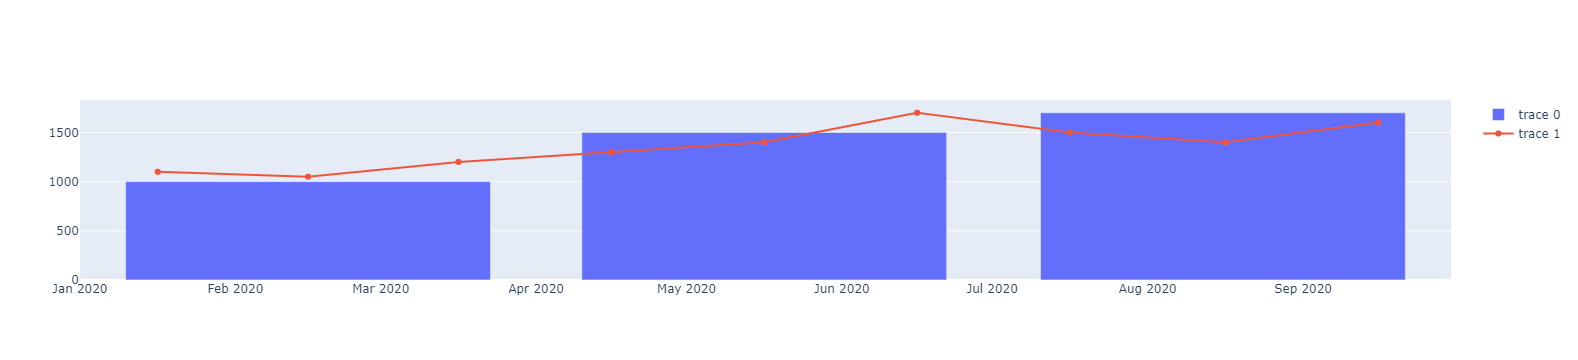

In [219]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(
    x=["2020-01-01", "2020-04-01", "2020-07-01"],
    y=[1000, 1500, 1700],
    xperiod="M3",
    # xperiodalignment="middle",
    # xhoverformat="Q%q",
    # hovertemplate="%{y}%{_xother}"
))

fig.add_trace(go.Scatter(
    x=["2020-01-01", "2020-02-01", "2020-03-01",
      "2020-04-01", "2020-05-01", "2020-06-01",
      "2020-07-01", "2020-08-01", "2020-09-01"],
    y=[1100,1050,1200,1300,1400,1700,1500,1400,1600],
    xperiod="M1",
    # xperiodalignment="middle",
    # hovertemplate="%{y}%{_xother}"
))

fig.update_layout(hovermode="x unified")
fig.show()

trades=[Trade(pair='ICX/USDT', is_buy=True, price=1.248, timestamp=datetime.datetime(2021, 12, 6, 21, 0), amount=40.06410256410256), Trade(pair='ICX/USDT', is_buy=False, price=1.285, timestamp=datetime.datetime(2021, 12, 7, 4, 0), amount=40.06410256410256), Trade(pair='ICX/USDT', is_buy=True, price=1.295, timestamp=datetime.datetime(2021, 12, 7, 6, 0), amount=38.610038610038615), Trade(pair='ICX/USDT', is_buy=False, price=1.31, timestamp=datetime.datetime(2021, 12, 7, 8, 0), amount=38.610038610038615), Trade(pair='ICX/USDT', is_buy=True, price=1.305, timestamp=datetime.datetime(2021, 12, 7, 10, 0), amount=38.31417624521073), Trade(pair='ICX/USDT', is_buy=False, price=1.285, timestamp=datetime.datetime(2021, 12, 7, 12, 0), amount=38.31417624521073), Trade(pair='ICX/USDT', is_buy=True, price=1.309, timestamp=datetime.datetime(2021, 12, 7, 13, 0), amount=38.19709702062644), Trade(pair='ICX/USDT', is_buy=True, price=1.327, timestamp=datetime.datetime(2021, 12, 7, 15, 0), amount=37.67897513

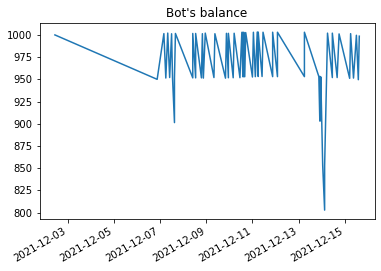

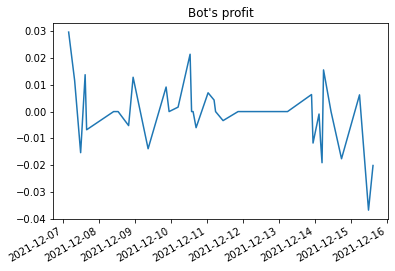

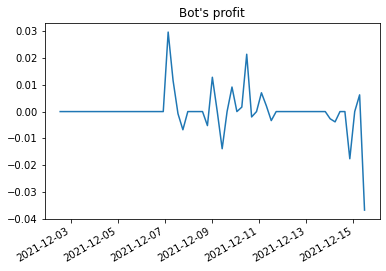

In [54]:
print(res1)
plot_balance(res1)
plot_profit(res1)
plot_block_profit(res1, hours=5)

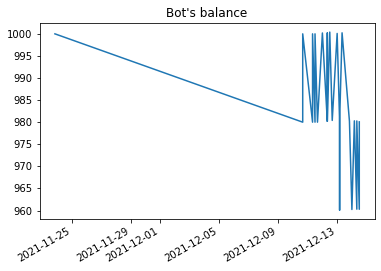

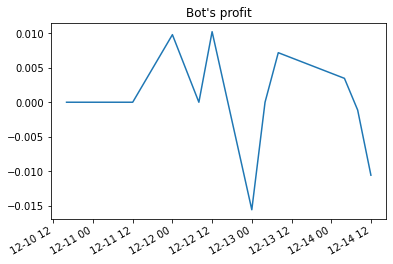

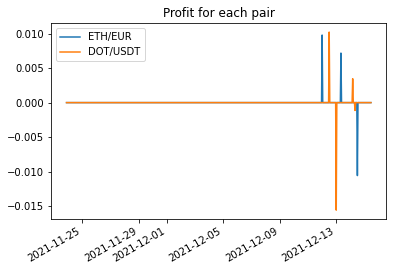

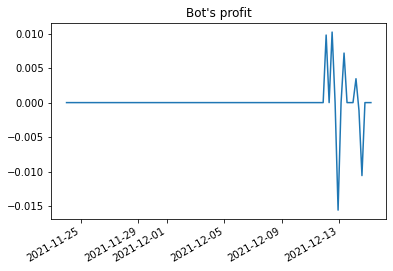

In [96]:
fbot2 = FakeBot("bot1/config.yml")
res2 = fbot.test_strategy(calc_ind, buy_sig, sell_sig, last_n_days=5)
plot_balance(res2)
plot_profit(res2)
plot_pairs_profit(res2,fbot.config["currency_pairs"] )
plot_block_profit(res2, hours=5)

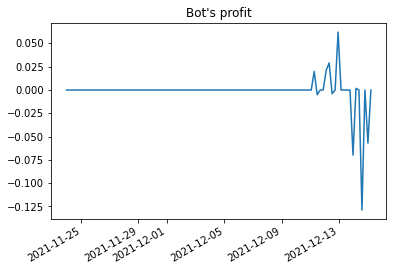

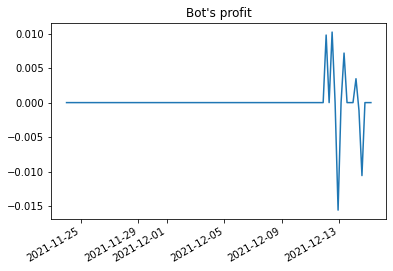

trades=[Trade(pair='DOT/USDT', is_buy=True, price=26.45, timestamp=datetime.datetime(2021, 12, 10, 16, 0), amount=0.7561436672967864), Trade(pair='DOT/USDT', is_buy=False, price=26.45, timestamp=datetime.datetime(2021, 12, 10, 16, 0), amount=0.7561436672967864), Trade(pair='ETH/EUR', is_buy=True, price=3456.0, timestamp=datetime.datetime(2021, 12, 10, 20, 0), amount=0.005787037037037037), Trade(pair='ETH/EUR', is_buy=False, price=3525.0, timestamp=datetime.datetime(2021, 12, 11, 4, 0), amount=0.005787037037037037), Trade(pair='DOT/USDT', is_buy=True, price=27.67, timestamp=datetime.datetime(2021, 12, 11, 4, 0), amount=0.7228044813877845), Trade(pair='DOT/USDT', is_buy=True, price=27.17, timestamp=datetime.datetime(2021, 12, 11, 8, 0), amount=0.736105999263894), Trade(pair='DOT/USDT', is_buy=True, price=27.53, timestamp=datetime.datetime(2021, 12, 11, 12, 0), amount=0.726480203414457), Trade(pair='DOT/USDT', is_buy=False, price=27.53, timestamp=datetime.datetime(2021, 12, 11, 12, 0), am

In [113]:
plot_block_profit(res1, hours=5) #fbot1
plot_block_profit(res2, hours=5) #fbot2
print(res1)

In [98]:
from pandas import to_datetime
from technical.util import resample_to_interval, resampled_merge

def calc_indicators_adv(candles):
    # print(candles)
    
    candles = candles.rename(columns={"time": "date"})
    candles["date"] = to_datetime(candles["date"], unit='s')
    # print(candles)

    # dataframe_long = resample_to_interval(candles, 240)
    # dataframe_long['rsi'] = ta.RSI(dataframe_long, timeperiod=9)
    # dataframe = resampled_merge(candles, dataframe_long)
    dataframe = candles
    dataframe['rsi'] = ta.RSI(dataframe, timeperiod=14)
    dataframe['ema'] = ta.EMA(dataframe, timeperiod=50)
    dataframe['sma2'] = ta.SMA(dataframe, timeperiod=50)
    dataframe['roc'] = ta.ROC(dataframe, timeperiod=5)

    dataframe['sma1'] = ta.SMA(dataframe, timeperiod=20)
    dataframe['sma3'] = ta.SMA(dataframe, timeperiod=5)
    dataframe['sma'] = ta.SMA(dataframe, timeperiod=166)

    dataframe.fillna(method='ffill', inplace=True)

    return dataframe

def buy_adv(indicators):

    buy = False
    # DOWN TREND
    if ((indicators.iloc[-1]['volume'] > 0) &                    
        (indicators.iloc[-1]['close'] > indicators.iloc[-1]['open']) &
        (indicators['rsi'].shift(1).iloc[-1] < indicators.iloc[-1]['rsi']) &
        (((indicators.iloc[-1]['sma'] - indicators['sma'].shift(1).iloc[-1]) / indicators.iloc[-1]['sma']) * 100 > -0.3) &
        (((indicators.iloc[-1]['sma'] - indicators['sma'].shift(1).iloc[-1]) / indicators.iloc[-1]['sma']) * 100 < 0.15)

        ):
        buy = False

    # UP TREND
    if ((indicators.iloc[-1]['volume'] > 0) &
                (indicators.iloc[-1]['close'] > indicators.iloc[-1]['open']) &
                (indicators['rsi'].shift(1).iloc[-1] < indicators.iloc[-1]['rsi']) &
                (((indicators.iloc[-1]['sma'] - indicators['sma'].shift(1).iloc[-1]) / indicators.iloc[-1]['sma']) * 100 >= 0.15)

        ):
        buy = True


#     if(
#             (indicators.iloc[-1]['resample_240_rsi'] > 110)
#         ):

#         buy = False

    return buy


def sell_adv(indicators):
    sell = False
    # UP TREND
    if (
                (((indicators.iloc[-1]['sma'] - indicators['sma'].shift(1).iloc[-1]) / indicators.iloc[-1]['sma']) * 100 >= 0.15) &
                (indicators.iloc[-1]['volume'] > 0) &
                (indicators['rsi'].shift(2).iloc[-1] > indicators['rsi'].shift(1).iloc[-1]) &
                (indicators['rsi'].shift(1).iloc[-1] > indicators.iloc[-1]['rsi'])

        ):
        sell = True

    if (
                (indicators['ema'].shift(1).iloc[-1] < indicators.iloc[-1]['ema']) &
                (indicators['rsi'].shift(1).iloc[-1] > indicators.iloc[-1]['rsi']) &
                (indicators['sma3'].shift(2).iloc[-1] < indicators['sma3'].shift(1).iloc[-1]) &
                (indicators['sma3'].shift(1).iloc[-1] < indicators.iloc[-1]['sma3']) &
                ((indicators.iloc[-1]['rsi'] > 65) |
                 (indicators['rsi'].shift(3).iloc[-1] > 65) |
                 (indicators['rsi'].shift(2).iloc[-1] > 65) |
                 (indicators['rsi'].shift(1).iloc[-1] > 65))
        ):
        dell = True

    # DOWN TREND
    if (
                (((indicators.iloc[-1]['sma'] - indicators['sma'].shift(1).iloc[-1]) / indicators.iloc[-1]['sma']) * 100 > -0.3) &
                (((indicators.iloc[-1]['sma'] - indicators['sma'].shift(1).iloc[-1]) / indicators.iloc[-1]['sma']) * 100 < 0.15) &
                (indicators.iloc[-1]['close'] < indicators.iloc[-1]['open']) &
                (indicators['close'].shift(1).iloc[-1] < indicators['open'].shift(1).iloc[-1]) &
                (indicators.iloc[-1]['volume'] > 0) &
                (indicators['rsi'].shift(1).iloc[-1] > indicators.iloc[-1]['rsi'])
        ):
        sell = True

    if(
                (indicators['open'].shift(1).iloc[-1] > indicators.iloc[-1]['close']) &
                (indicators['open'].shift(1).iloc[-1] > indicators['close'].shift(1).iloc[-1]) &
                (indicators['open'].shift(2).iloc[-1] > indicators['close'].shift(2).iloc[-1]) &
                (indicators['open'].shift(3).iloc[-1] > indicators['close'].shift(3).iloc[-1]) &
                (indicators['open'].shift(4).iloc[-1] > indicators['close'].shift(4).iloc[-1]) 
        ):
        sell = True

    return sell

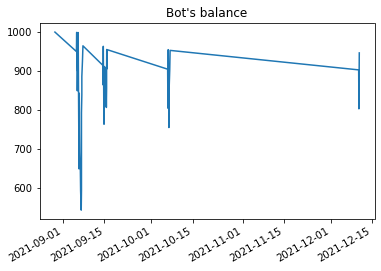

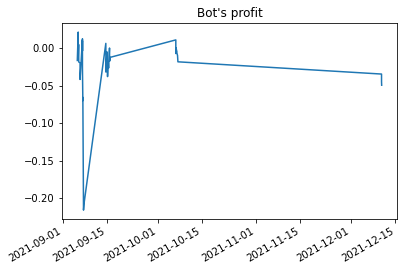

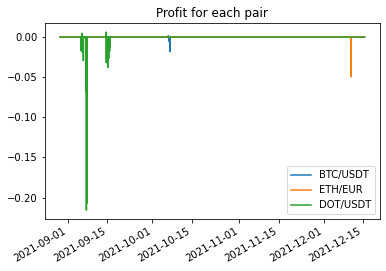

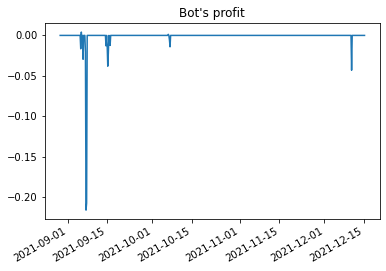

trades=[Trade(pair='DOT/USDT', is_buy=True, price=33.82, timestamp=datetime.datetime(2021, 9, 5, 13, 0), amount=1.478415138971023), Trade(pair='DOT/USDT', is_buy=False, price=33.26, timestamp=datetime.datetime(2021, 9, 5, 15, 0), amount=1.478415138971023), Trade(pair='DOT/USDT', is_buy=True, price=33.44, timestamp=datetime.datetime(2021, 9, 5, 16, 0), amount=1.4952153110047848), Trade(pair='DOT/USDT', is_buy=True, price=33.88, timestamp=datetime.datetime(2021, 9, 5, 19, 0), amount=1.4757969303423848), Trade(pair='DOT/USDT', is_buy=True, price=34.6, timestamp=datetime.datetime(2021, 9, 5, 20, 0), amount=1.445086705202312), Trade(pair='DOT/USDT', is_buy=False, price=34.15, timestamp=datetime.datetime(2021, 9, 5, 22, 0), amount=1.4952153110047848), Trade(pair='DOT/USDT', is_buy=False, price=34.15, timestamp=datetime.datetime(2021, 9, 5, 22, 0), amount=1.445086705202312), Trade(pair='DOT/USDT', is_buy=True, price=34.42, timestamp=datetime.datetime(2021, 9, 5, 23, 0), amount=1.4526438117373

In [112]:
fbot = FakeBot("bot1/config.yml")
res = fbot.test_strategy(calc_indicators_adv, buy_adv, sell_adv, last_n_days=100)
plot_balance(res)
plot_profit(res)
plot_pairs_profit(res,fbot.config["currency_pairs"] )
plot_block_profit(res, hours=5)
print(res)

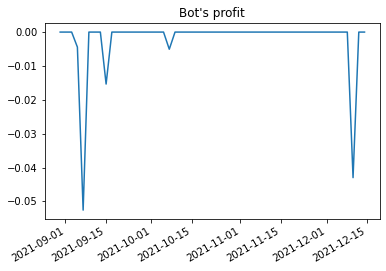

In [100]:
plot_block_profit(res, hours=48)

In [111]:
# %load bot1/strategy.py
#------Do not change those imports------
from pandas import DataFrame
from bot_entity.bot import Bot
import talib.abstract as ta
from technical.util import resample_to_interval, resampled_merge
#---------------------------------------



# Do not change class and methods names

class Strategy(Bot):

    def calc_indicators(self, candles:DataFrame):

        candles[pair] = self.candles[pair].rename(columns={"time": "date"})
        candles[pair]["date"] = to_datetime(self.candles[pair]["date"], unit='s')

        dataframe_long = resample_to_interval(candles, 240)
        dataframe_long['rsi'] = ta.RSI(dataframe_long, timeperiod=9)
        dataframe = resampled_merge(candles, dataframe_long)

        dataframe['rsi'] = ta.RSI(dataframe, timeperiod=14)
        dataframe['ema'] = ta.EMA(dataframe, timeperiod=50)
        dataframe['sma2'] = ta.SMA(dataframe, timeperiod=50)
        dataframe['roc'] = ta.ROC(dataframe, timeperiod=5)

        dataframe['sma1'] = ta.SMA(dataframe, timeperiod=20)
        dataframe['sma3'] = ta.SMA(dataframe, timeperiod=5)
        dataframe['sma'] = ta.SMA(dataframe, timeperiod=166)

        dataframe.fillna(method='ffill', inplace=True)

        return dataframe

    def check_buy_signals(self, indicators):

        buy = False
        # DOWN TREND
        if ((indicators.iloc[-1]['volume'] > 0) &                    
            (indicators.iloc[-1]['close'] > indicators.iloc[-1]['open']) &
            (indicators['rsi'].shift(1).iloc[-1] < indicators.iloc[-1]['rsi']) &
            (((indicators.iloc[-1]['sma'] - indicators['sma'].shift(1).iloc[-1]) / indicators.iloc[-1]['sma']) * 100 > -0.3) &
            (((indicators.iloc[-1]['sma'] - indicators['sma'].shift(1).iloc[-1]) / indicators.iloc[-1]['sma']) * 100 < 0.15)

            ):
            buy = False

        # UP TREND
        if ((indicators.iloc[-1]['volume'] > 0) &
                    (indicators.iloc[-1]['close'] > indicators.iloc[-1]['open']) &
                    (indicators['rsi'].shift(1).iloc[-1] < indicators.iloc[-1]['rsi']) &
                    (((indicators.iloc[-1]['sma'] - indicators['sma'].shift(1).iloc[-1]) / indicators.iloc[-1]['sma']) * 100 >= 0.15)

            ):
            buy = True


        if(
                (indicators.iloc[-1]['resample_240_rsi'] > 110)
            ):

            buy = False
        
        return buy


    def check_sell_signals(self, indicators):
        sell = False
        # UP TREND
        if (
                    (((indicators.iloc[-1]['sma'] - indicators['sma'].shift(1).iloc[-1]) / indicators.iloc[-1]['sma']) * 100 >= 0.15) &
                    (indicators.iloc[-1]['volume'] > 0) &
                    (indicators['rsi'].shift(2).iloc[-1] > indicators['rsi'].shift(1).iloc[-1]) &
                    (indicators['rsi'].shift(1).iloc[-1] > indicators.iloc[-1]['rsi'])

            ):
            sell = True

        if (
                    (indicators['ema'].shift(1).iloc[-1] < indicators.iloc[-1]['ema']) &
                    (indicators['rsi'].shift(1).iloc[-1] > indicators.iloc[-1]['rsi']) &
                    (indicators['sma3'].shift(2).iloc[-1] < indicators['sma3'].shift(1).iloc[-1]) &
                    (indicators['sma3'].shift(1).iloc[-1] < indicators.iloc[-1]['sma3']) &
                    ((indicators.iloc[-1]['rsi'] > 65) |
                     (indicators['rsi'].shift(3).iloc[-1] > 65) |
                     (indicators['rsi'].shift(2).iloc[-1] > 65) |
                     (indicators['rsi'].shift(1).iloc[-1] > 65))
            ):
            dell = True

        # DOWN TREND
        if (
                    (((indicators.iloc[-1]['sma'] - indicators['sma'].shift(1).iloc[-1]) / indicators.iloc[-1]['sma']) * 100 > -0.3) &
                    (((indicators.iloc[-1]['sma'] - indicators['sma'].shift(1).iloc[-1]) / indicators.iloc[-1]['sma']) * 100 < 0.15) &
                    (indicators.iloc[-1]['close'] < indicators.iloc[-1]['open']) &
                    (indicators['close'].shift(1).iloc[-1] < indicators['open'].shift(1).iloc[-1]) &
                    (indicators.iloc[-1]['volume'] > 0) &
                    (indicators['rsi'].shift(1).iloc[-1] > indicators.iloc[-1]['rsi'])
            ):
            sell = True

        if(
                    (indicators['open'].shift(1).iloc[-1] > indicators.iloc[-1]['close']) &
                    (indicators['open'].shift(1).iloc[-1] > indicators['close'].shift(1).iloc[-1]) &
                    (indicators['open'].shift(2).iloc[-1] > indicators['close'].shift(2).iloc[-1]) &
                    (indicators['open'].shift(3).iloc[-1] > indicators['close'].shift(3).iloc[-1]) &
                    (indicators['open'].shift(4).iloc[-1] > indicators['close'].shift(4).iloc[-1]) 
            ):
            sell = True
            
        return sell

